**Main tasks of notebook**
* To read data and to preprocess it.
* To build prediction models for total teachers number in general education schools for 2023-2027 years.
* To do needed precalculations and visualizations to realize previous task.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

**Data reading**

In [2]:
consumer_price_indices = pd.read_csv("./processed data/Consumer_price_indices_for_food_and_services.csv", sep=";")
general_education_schools = pd.read_csv("./processed data/General_education_schools.csv", sep=";")
population = pd.read_csv("./processed data/population.csv", sep=";")
preschool_educational_institutions = pd.read_csv("./processed data/Preschool_educational_institutions.csv", sep=";")
vocational_schools = pd.read_csv("./processed data/Vocational_schools.csv", sep=";")

In [3]:
consumer_price_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Year                                                                  22 non-null     int64 
 1   Consumer_price_indices                                                22 non-null     object
 2   Food_and_non-alcoholic_beverages                                      22 non-null     object
 3   Alcoholic_beverages_tobacco                                           22 non-null     object
 4   Clothing_and_footwear                                                 22 non-null     object
 5   Housing_water_electricity_gas_and_other_fuels                         22 non-null     object
 6   Furnishings_household_equipment_and_routine_maintenance_of_the_house  22 non-null     object
 7   Health    

In [4]:
general_education_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Year                                            33 non-null     object
 1   Total_institutions_number                       33 non-null     object
 2   Total_students_number                           33 non-null     int64 
 3   full-time_students                              33 non-null     int64 
 4   part_time_students_including_distance_learning  33 non-null     int64 
 5   incomplete_secondary_education_dipomas_number   33 non-null     int64 
 6   complete_secondary_education_diplomas_number    33 non-null     int64 
 7   Total_teachers                                  33 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.2+ KB


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Year                             33 non-null     int64 
 1   Total_present_population_thnds   33 non-null     object
 2   Total_resident_population_thnds  33 non-null     object
dtypes: int64(1), object(2)
memory usage: 920.0+ bytes


In [6]:
preschool_educational_institutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Year                                                                                                       33 non-null     int64 
 1   Number_of_institutions_of_preschool_education_thsds                                                        33 non-null     object
 2   Number_of_places_in_institutions_of_preschool_education_thsds                                              33 non-null     object
 3   Number_of_persons_in_institutions_of_preschool_education_thsds                                             33 non-null     object
 4   Coverage_of_children_by_institutions_of_preschool_education_percentage_of_total_chi

In [7]:
vocational_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     33 non-null     int64 
 1   Total_schools_number     33 non-null     object
 2   Total_students_thsds     33 non-null     object
 3   Admitted_students_thsds  33 non-null     object
 4   Graduated_thsds          33 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.4+ KB


**Primary preprocessing**

Firstly, we must present all numeric variables from string to numeric type.

In [8]:
for col in consumer_price_indices.columns[1:]:
    for i in consumer_price_indices.index:
        consumer_price_indices[col][i] = float(consumer_price_indices[col][i].replace(',', '.'))

consumer_price_indices = consumer_price_indices.astype('float')

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1522075323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_price_indices[col][i] = float(consumer_price_indices[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1522075323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_price_indices[col][i] = float(consumer_price_indices[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1522075323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [9]:
for i in general_education_schools.index:
    general_education_schools["Total_institutions_number"][i] = float(general_education_schools["Total_institutions_number"][i].replace(',', '.'))

for col in general_education_schools.columns[1:]:
    general_education_schools[col] = general_education_schools[col].astype("float")

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1905154766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_education_schools["Total_institutions_number"][i] = float(general_education_schools["Total_institutions_number"][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1905154766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_education_schools["Total_institutions_number"][i] = float(general_education_schools["Total_institutions_number"][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1905154766.py:2: SettingWithCopyWarning: 
A va

In [10]:
for col in population.columns[1:]:
    for i in population.index:
        population[col][i] = float(population[col][i].replace(',', '.'))

population = population.astype('float')

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\954786367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population[col][i] = float(population[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\954786367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population[col][i] = float(population[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\954786367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [11]:
for col in preschool_educational_institutions.columns[1:]:
    for i in population.index:
        preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))

preschool_educational_institutions = preschool_educational_institutions.astype('float')

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preschool_educational_institutions[col][i] = float(preschool_educational_institutions[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\1366899910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [12]:
for col in vocational_schools.columns[1:]:
    for i in vocational_schools.index:
        vocational_schools[col][i] = float(vocational_schools[col][i].replace(',', '.'))

vocational_schools = vocational_schools.astype('float')

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\3952575358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vocational_schools[col][i] = float(vocational_schools[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\3952575358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vocational_schools[col][i] = float(vocational_schools[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\3952575358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\3952575358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vocational_schools[col][i] = float(vocational_schools[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\3952575358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vocational_schools[col][i] = float(vocational_schools[col][i].replace(',', '.'))
C:\Users\Lord Adwond\AppData\Local\Temp\ipykernel_10916\3952575358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Now let make all data to one format. To do it we must preprocess data about general education schools and make all datasets starting from same year.

In [13]:
general_education_schools

,Year,Total_institutions_number,Total_students_number,full-time_students,part_time_students_including_distance_learning,incomplete_secondary_education_dipomas_number,complete_secondary_education_diplomas_number,Total_teachers
0,1990_91,21.8,7132.0,6939.0,193.0,696.0,406.0,537.0
1,1991_92,21.9,7102.0,6918.0,184.0,699.0,409.0,543.0
2,1992_93,22.0,7088.0,6918.0,170.0,683.0,393.0,565.0
3,1993_94,22.1,7096.0,6937.0,159.0,674.0,375.0,579.0
4,1994_95,22.3,7125.0,6972.0,153.0,654.0,355.0,576.0
5,1995_96,22.3,7143.0,7007.0,136.0,639.0,361.0,596.0
6,1996_97,22.2,7134.0,7016.0,118.0,657.0,374.0,585.0
7,1997_98,22.1,7078.0,6970.0,108.0,670.0,378.0,571.0
8,1998_99,22.1,6987.0,6876.0,111.0,724.0,408.0,573.0
9,1999_00,22.2,6857.0,6743.0,114.0,737.0,434.0,576.0


In [14]:
general_education_schools["Year"] = [float(yyyy.split("_")[0]) for yyyy in general_education_schools["Year"].to_list()]
general_education_schools

,Year,Total_institutions_number,Total_students_number,full-time_students,part_time_students_including_distance_learning,incomplete_secondary_education_dipomas_number,complete_secondary_education_diplomas_number,Total_teachers
0,1990.0,21.8,7132.0,6939.0,193.0,696.0,406.0,537.0
1,1991.0,21.9,7102.0,6918.0,184.0,699.0,409.0,543.0
2,1992.0,22.0,7088.0,6918.0,170.0,683.0,393.0,565.0
3,1993.0,22.1,7096.0,6937.0,159.0,674.0,375.0,579.0
4,1994.0,22.3,7125.0,6972.0,153.0,654.0,355.0,576.0
5,1995.0,22.3,7143.0,7007.0,136.0,639.0,361.0,596.0
6,1996.0,22.2,7134.0,7016.0,118.0,657.0,374.0,585.0
7,1997.0,22.1,7078.0,6970.0,108.0,670.0,378.0,571.0
8,1998.0,22.1,6987.0,6876.0,111.0,724.0,408.0,573.0
9,1999.0,22.2,6857.0,6743.0,114.0,737.0,434.0,576.0


In [15]:
general_education_schools = general_education_schools.astype("float")

In [16]:
consumer_price_indices.head()

,Year,Consumer_price_indices,Food_and_non-alcoholic_beverages,Alcoholic_beverages_tobacco,Clothing_and_footwear,Housing_water_electricity_gas_and_other_fuels,Furnishings_household_equipment_and_routine_maintenance_of_the_house,Health,Transport,Communication,Recreation_and_culture,Education,Restaurants_and_hotels,Miscellaneous_goods_and_services
0,2001.0,106.1,108.0,102.0,101.8,104.5,101.2,105.6,98.5,99.2,104.3,110.7,112.5,101.5
1,2002.0,99.4,97.6,100.7,100.7,101.7,100.7,103.6,106.6,109.8,102.0,106.0,108.4,102.4
2,2003.0,108.2,111.1,104.3,100.7,106.4,102.2,103.5,102.4,100.0,101.9,107.1,108.0,102.3
3,2004.0,112.3,115.2,104.6,101.4,107.2,105.3,107.1,117.7,100.1,104.5,109.4,113.0,106.9
4,2005.0,110.3,110.2,107.7,102.2,114.6,102.1,109.2,119.7,101.7,102.7,118.0,118.6,106.3


In [17]:
general_education_schools = general_education_schools.take(general_education_schools.index[11:])
general_education_schools.index = range(len(general_education_schools))

population = population.take(population.index[11:])
population.index = range(len(population))

preschool_educational_institutions = preschool_educational_institutions.take(preschool_educational_institutions.index[11:])
preschool_educational_institutions.index = range(len(preschool_educational_institutions))

vocational_schools = vocational_schools.take(vocational_schools.index[11:])
vocational_schools.index = range(len(vocational_schools))

Now let make one dataset from all having.

In [18]:
data = consumer_price_indices.copy()
data = data.merge(general_education_schools, on="Year")
data = data.merge(population, on="Year")
data = data.merge(preschool_educational_institutions, on="Year")
data = data.merge(vocational_schools, on="Year")

In [19]:
data["Year"] = data["Year"].astype("int")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 31 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Year                                                                                                       22 non-null     int32  
 1   Consumer_price_indices                                                                                     22 non-null     float64
 2   Food_and_non-alcoholic_beverages                                                                           22 non-null     float64
 3   Alcoholic_beverages_tobacco                                                                                22 non-null     float64
 4   Clothing_and_footwear                                                       

**Statistical analysis**

Ok, we have alone dataset with only numeric parameters. Before building prediction models we must do some caculations to understand behaviour of data.

Firstly, let try to find and filter well-correlated parameters.

In [20]:
well_correlated = []

for i in range(len(data.columns)-1):
    for j in range(i+1, len(data.columns)):
        if abs( data[data.columns[i]].corr(data[data.columns[j]]) )>0.7:
            well_correlated.append([data.columns[i], data.columns[j], data[data.columns[i]].corr(data[data.columns[j]])])

print("Well-correlated parameters:")
for pair in well_correlated:
    print(f"{pair[0]} and {pair[1]}, r={pair[2]}")

Well-correlated parameters:
Year and Total_institutions_number, r=-0.9718164867043494
Year and Total_students_number, r=-0.8518791636737807
Year and full-time_students, r=-0.8791491596245649
Year and part_time_students_including_distance_learning, r=-0.9916830306397597
Year and incomplete_secondary_education_dipomas_number, r=-0.8902361399453195
Year and complete_secondary_education_diplomas_number, r=-0.929463592956562
Year and Total_teachers, r=-0.9672291633058027
Year and Total_present_population_thnds, r=-0.9788248258006159
Year and Total_resident_population_thnds, r=-0.9787225341827145
Year and Coverage_of_children_by_institutions_of_preschool_education_percentage_of_total_children_of_specified_age, r=0.8307323251260504
Year and Total_schools_number, r=-0.8813038272986777
Year and Total_students_thsds, r=-0.9733203291672419
Year and Admitted_students_thsds, r=-0.968712687471164
Year and Graduated_thsds, r=-0.960808345907863
Consumer_price_indices and Food_and_non-alcoholic_beverag

In [21]:
print(f"General number of well-correlated parameters {len(well_correlated)}")

General number of well-correlated parameters 134


What we may see using this list?
* We may see, that year as parameter we may drop from dataset.
* Also Total_teachers parameter (what we will predict later) is well-correlated with many other parameters.
* We may drop Admitted_students_thsds, Total_students_thsds, Total_present_population_thnds and Total_resident_population_thnds parameters.

Let drop marked parameters from dataset.

In [22]:
data = data.drop(["Admitted_students_thsds", "Total_students_thsds", "Total_present_population_thnds", "Total_resident_population_thnds", "Year"], axis="columns")

In [23]:
well_correlated = []

for i in range(len(data.columns)-1):
    for j in range(i+1, len(data.columns)):
        if abs( data[data.columns[i]].corr(data[data.columns[j]]) )>0.7:
            well_correlated.append([data.columns[i], data.columns[j], data[data.columns[i]].corr(data[data.columns[j]])])

print("Well-correlated parameters:")
for pair in well_correlated:
    print(f"{pair[0]} and {pair[1]}, r={pair[2]}")

Well-correlated parameters:
Consumer_price_indices and Food_and_non-alcoholic_beverages, r=0.9404639148139893
Consumer_price_indices and Clothing_and_footwear, r=0.8341701135409928
Consumer_price_indices and Housing_water_electricity_gas_and_other_fuels, r=0.7116980236840111
Consumer_price_indices and Furnishings_household_equipment_and_routine_maintenance_of_the_house, r=0.907742544782412
Consumer_price_indices and Health, r=0.8391360879950006
Consumer_price_indices and Recreation_and_culture, r=0.9266316305749349
Consumer_price_indices and Restaurants_and_hotels, r=0.7925931723087656
Consumer_price_indices and Miscellaneous_goods_and_services, r=0.8662133446800098
Food_and_non-alcoholic_beverages and Furnishings_household_equipment_and_routine_maintenance_of_the_house, r=0.8393308890744396
Food_and_non-alcoholic_beverages and Health, r=0.7741233331975215
Food_and_non-alcoholic_beverages and Recreation_and_culture, r=0.8328117442603264
Food_and_non-alcoholic_beverages and Restaurants_

In [24]:
print(f"General number of well-correlated parameters {len(well_correlated)}")

General number of well-correlated parameters 74


Now we may see, that number of well-correlated pairs of parameters are more less. It means, that now we may see, what parameters are statistically important.

In [25]:
y = data["Total_teachers"]
X = data.drop("Total_teachers", axis="columns")

In [26]:
for col in X.columns:
    result = stats.ttest_rel(y, X[col])
    print(f"For Total_teachers and {col}:\n p-value={result[1]}\n")

For Total_teachers and Consumer_price_indices:
 p-value=2.5865192722044954e-19

For Total_teachers and Food_and_non-alcoholic_beverages:
 p-value=3.0956801452462706e-19

For Total_teachers and Alcoholic_beverages_tobacco:
 p-value=3.625198135877026e-19

For Total_teachers and Clothing_and_footwear:
 p-value=5.75314230216249e-20

For Total_teachers and Housing_water_electricity_gas_and_other_fuels:
 p-value=2.3531753710894776e-18

For Total_teachers and Furnishings_household_equipment_and_routine_maintenance_of_the_house:
 p-value=2.291666040508033e-19

For Total_teachers and Health:
 p-value=1.3175941413222375e-19

For Total_teachers and Transport:
 p-value=3.4530867096650955e-19

For Total_teachers and Communication:
 p-value=9.45895921371536e-20

For Total_teachers and Recreation_and_culture:
 p-value=1.3637685649366844e-19

For Total_teachers and Education:
 p-value=7.630485144845755e-20

For Total_teachers and Restaurants_and_hotels:
 p-value=7.360497931673323e-20

For Total_teache

We see, that with α=0.01 we must use selectedparameters for prediction.

**Prediction model selection**

Now let's select model to predict total teachers number in the next year.

**Firstly, let's try to answer next questions:**
* May we use linear regression as prediction model in context of using data?
* If no, may we use polynomial regression in this context?
* If previous variants are not so good, may we use regularization to use it?

Firstly, let's build and test linear and polynomial repgression models.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [31]:
linear_regrression = LinearRegression().fit(X, y)

print(f"Max error: {metrics.max_error(y, linear_regrression.predict(X))}")
print(f"Mean absolute error: {metrics.mean_absolute_error(y, linear_regrression.predict(X))}")
print(f"Mean squared error: {metrics.mean_squared_error(y, linear_regrression.predict(X))}")

Max error: 9.094947017729282e-13
Mean absolute error: 1.9378438248002733e-13
Mean squared error: 7.740131086921974e-26


We may see, that linear regression model is excellent! But what if we build quadratic regression model and see values of used errors?

In [32]:
new_X = PolynomialFeatures(degree=2).fit_transform(X)

quadratic_regrression = LinearRegression().fit(new_X, y)

print(f"Max error: {metrics.max_error(y, quadratic_regrression.predict(new_X))}")
print(f"Mean absolute error: {metrics.mean_absolute_error(y, quadratic_regrression.predict(new_X))}")
print(f"Mean squared error: {metrics.mean_squared_error(y, quadratic_regrression.predict(new_X))}")

Max error: 6.821210263296962e-13
Mean absolute error: 3.0488742843524297e-13
Mean squared error: 1.2425333775210607e-25


**As we see, that to predict total teachers number in next year it may enough to use linear regression model. Seeing the structure of using data, we may try use linear regression to predict total teachers number in 2024-2027 years.** Let's try it. But let's remember, to prediction we formally use time serieses.

In [34]:
X_for_2023 = X.copy()
y_for_2023 = y.copy()

X_for_2024 = X.take(X.index[:-1])
y_for_2024 = y.take(y.index[1:])

X_for_2025 = X.take(X.index[:-2])
y_for_2025 = y.take(y.index[2:])

X_for_2026 = X.take(X.index[:-3])
y_for_2026 = y.take(y.index[3:])

X_for_2027 = X.take(X.index[:-4])
y_for_2027 = y.take(y.index[4:])

In [36]:
model_for_2023 = LinearRegression().fit(X_for_2023, y_for_2023)
model_for_2024 = LinearRegression().fit(X_for_2024, y_for_2024)
model_for_2025 = LinearRegression().fit(X_for_2025, y_for_2025)
model_for_2026 = LinearRegression().fit(X_for_2026, y_for_2026)
model_for_2027 = LinearRegression().fit(X_for_2027, y_for_2027)

**Calculating and visualizing of prediction**

In [46]:
y_2023 = model_for_2023.predict(pd.DataFrame(X_for_2023.iloc[21]).T)
y_2024 = model_for_2024.predict(pd.DataFrame(X_for_2024.iloc[20]).T)
y_2025 = model_for_2025.predict(pd.DataFrame(X_for_2025.iloc[19]).T)
y_2026 = model_for_2026.predict(pd.DataFrame(X_for_2026.iloc[18]).T)
y_2027 = model_for_2027.predict(pd.DataFrame(X_for_2027.iloc[17]).T)

In [48]:
prediction = [[i for i in range(2023, 2027+1)]]
prediction.append([ 
    y_2023[0],
    y_2024[0],
    y_2025[0],
    y_2026[0],
    y_2027[0]
])

prediction

[[2023, 2024, 2025, 2026, 2027],
 [401.9999999999999,
  401.99999999999994,
  401.99999999999966,
  402.000000000001,
  401.9999999999993]]

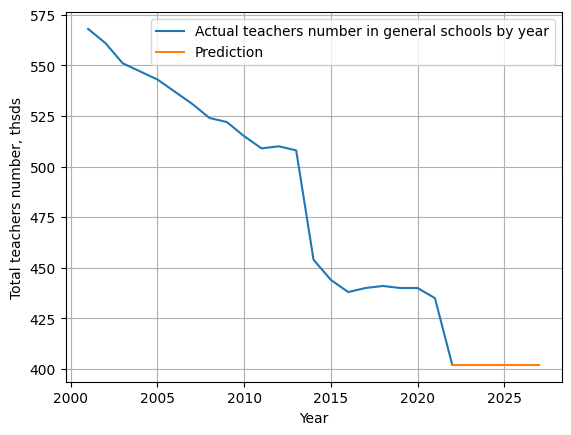

In [59]:
plt.plot(range(2001, 2022+1), data["Total_teachers"], label="Actual teachers number in general schools by year")
plt.plot([2022]+prediction[0], [data.loc[21]["Total_teachers"]]+prediction[1], label="Prediction")
plt.grid()
plt.legend()
plt.xlabel("Year")
plt.ylabel("Total teachers number, thsds")
plt.show()

We see, that linear regression gives nonrealistic prediction. And it's logical using previous calculations. So, **let's try to build prediction model of other type**.